In [1]:
#from PyDBDdim.utils import DimensionlessLearning
import torch
torch.manual_seed(0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import numpy as np
import sys
import matplotlib
sys.path.append(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new')
import vics_fcns as vf


In [2]:
#df = pd.ExcelFile(r"mass_balance_params.xlsx")
df_2 = pd.ExcelFile(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\data\data_packing\collected_output_files_packing\data_from_EB_looping_all_sizes_remove_extraneous_dims.xlsx')
#df_y = pd.ExcelFile(r"energy_balance_params.xlsx")


In [15]:
# df_train_x['u_B_m_s'] = df_train_x['u_B_m_s'] / 1000 if np.min(df_train_x['u_B_m_s']) > 0 else df_train_x['u_B_m_s'] / 1000 - (np.min(df_train_x['u_B_m_s']) / 1000-1e-5)
# df_train_x['A_tot_m2'] = 1.
# df_train_x['t_a_s'] = df_train_x['t_a_s'] / 1e-7 if np.min(df_train_x['t_a_s']) > 0 else df_train_x['t_a_s'] / 1e-7 - (np.min(df_train_x['t_a_s']) / 1e-7-1e-5)
# df_train_x['t_b_s'] = df_train_x['t_b_s'] / 1e-4 if np.min(df_train_x['t_b_s']) > 0 else df_train_x['t_b_s'] / 1e-4 - (np.min(df_train_x['t_b_s']) / 1e-4-1e-5)
# df_train_x['Volume_m3'] = 1.
# df_train_x['K_iz_a_m3_s_atom'] = df_train_x['K_iz_a_m3_s_atom'] / 1e-15 if np.min(df_train_x['K_iz_a_m3_s_atom']) > 0 else df_train_x['K_iz_a_m3_s_atom'] / 1e-15 - (np.min(df_train_x['K_iz_a_m3_s_atom']) / 1e-15-1e-5)

# df_train_x['K_2_iz_a_m3_s_atom'] = df_train_x['K_2_iz_a_m3_s_atom'] / 1e-15 if np.min(df_train_x['K_2_iz_a_m3_s_atom']) > 0 else df_train_x['K_2_iz_a_m3_s_atom'] / 1e-15 - (np.min(df_train_x['K_2_iz_a_m3_s_atom']) / 1e-15-1e-5)

# df_train_x['K_iz_exc_a_m3_s_atom'] = df_train_x['K_iz_exc_a_m3_s_atom'] / 1e-14 if np.min(df_train_x['K_iz_exc_a_m3_s_atom']) > 0 else df_train_x['K_iz_exc_a_m3_s_atom'] / 1e-14 - (np.min(df_train_x['K_iz_exc_a_m3_s_atom']) / 1e-14-1e-5)

# df_train_x['n_sa_atoms_m3'] = df_train_x['n_sa_atoms_m3'] / 1e10 if np.min(df_train_x['n_sa_atoms_m3']) > 0 else df_train_x['n_sa_atoms_m3'] / 1e10 - (np.min(df_train_x['n_sa_atoms_m3']) / 1e10-1e-5)

# df_train_x['n_sb_atoms_m3'] = df_train_x['n_sb_atoms_m3'] / 1e10 if np.min(df_train_x['n_sb_atoms_m3']) > 0 else df_train_x['n_sb_atoms_m3'] / 1e10 - (np.min(df_train_x['n_sb_atoms_m3']) / 1e10-1e-5)

# df_train_x['A_a_m2'] = 1.

# df_train_x['A_b_m2'] = 1.

# df_train_x['n_He_exc_a_atoms_m3'] = df_train_x['n_He_exc_a_atoms_m3'] / 1e17 if np.min(df_train_x['n_He_exc_a_atoms_m3']) > 0 else df_train_x['n_He_exc_a_atoms_m3'] / 1e17 - (np.min(df_train_x['n_He_exc_a_atoms_m3']) / 1e17-1e-5)

def rescale(g):
    for i in range(0,g.shape[1]):
        if np.min(np.abs(g[:,i])) ==0:
            n = 0
        else:
            n = np.mean((np.log10(np.min(np.abs(g[:,i]))), np.log10(np.max(np.abs(g[:,i])))))
        if n<0:
                g[:,i] = g[:,i]/10**np.ceil(n) if np.min(g[:,i]) > 0 else g[:,i]/10**np.ceil(n) - (np.min(g[:,i]) / 10**np.ceil(n)-1e-5)
        else:
            g[:,i] = g[:,i]/10**np.floor(n) if np.min(g[:,i]) > 0 else g[:,i]/10**np.floor(n) - (np.min(g[:,i]) / 10**np.floor(n)-1e-5)
    return g

def rescale_vec(g, print_c = False):
    if np.min(np.abs(g)) ==0:
        n = 0
    else:
        n = np.mean((np.log10(np.min(np.abs(g))), np.log10(np.max(np.abs(g)))))
    if print_c == True:
        print(n)
    if n<0:
            g= g/10**np.ceil(n) if np.min(g) > 0 else g/10**np.ceil(n) - (np.min(g) / 10**np.ceil(n)-1e-5)
    else:
        g = g/10**np.floor(n) if np.min(g) > 0 else g/10**np.floor(n) - (np.min(g) / 10**np.floor(n)-1e-5)
    return g

In [4]:
#                   0             1           2                    3                   4                   5           6                7                    8                     9                        10                  11                  12                      13                          
#df1_names = [ 't_a_seconds', 'Q_a_As', 'V_p_ta_kgm2_s3_A','T_e_a_kgm2_s3_A', 'n_He_exc_a_atoms_m3', 'u_B_a_m_s', 'v_e_a_m_s', 'K_2_iz_a_m3_s_atom','K_loss_a_m6_s_atom2', 'K_iz_exc_a_m3_s_atom', 'K_exc_a_m3_s_atom', 'K_iz_a_m3_s_atom', 'K_elastic_a_m3_s_atom', 'E_elastic_a_kgm2_s2' ]


df_time_a = rescale(np.array(pd.read_excel(df_2, sheet_name='time_a_data').iloc[:,1:]))
df_time_a_units = np.array(pd.read_excel(df_2, sheet_name='time_a_data_units').iloc[:,1:])
df_time_a_n = pd.read_excel(df_2, sheet_name='time_a_data_names').iloc[:,1:]
time_a_n= [df_time_a_n.iloc[0,i] for i in range(0,df_time_a_n.shape[1])]
#print(df_time_a_n)
#print(df_time_a_units)


#                   0             1                2               3                   4              5          6             7                   8                    9                       10              11                   12                   13                  
#df2_names =  [ 't_b_seconds', 'Q_b_As', 'V_p_tb_kgm2_s3_A','T_e_kgm2_s3_A', 'n_He_exc_atoms_m3', 'u_B_m_s', 'v_e_m_s','K_2_iz_m3_s_atom','K_loss_m6_s_atom2', 'K_iz_exc_m3_s_atom', 'K_exc_m3_s_atom', 'K_iz_m3_s_atom', 'K_elastic_m3_s_atom', 'E_elastic_kgm2_s2' ]
df_time_b = rescale(np.array(pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:]))
df_time_b_units = np.array(pd.read_excel(df_2, sheet_name='time_b_data_units').iloc[:,1:])
df_time_b_n = pd.read_excel(df_2, sheet_name='time_b_data_names').iloc[:,1:]
time_b_n= [df_time_b_n.iloc[0,i] for i in range(0,df_time_b_n.shape[1])]


#                    0                   1                 2               3                 4               5               6                 7                  8           9        10        11                12                   13               14                   
#df3_names = ['E_period_kgm2_s2', 'n_sa_atoms_m3','n_sb_atoms_m3', 'n_e_electrons_m3', 'n_g_atoms_m3', 'T_g_kelvin', 'E_iz_kgm2_s2', 'E_iz_exc_kgm2_s2', 'E_exc_kgm2_s2', 'e_c_As', 'm_e_kg', 'M_He_kg',  'epsilon_A2s4_kg_m3', 'eps_0_A2s4_kg_m3', 'k_b_kgm2_s2_K']
df_other = rescale(np.array(pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]))
df_other_units = np.array(pd.read_excel(df_2, sheet_name='other_data_units').iloc[:,1:])
df_other_n = pd.read_excel(df_2, sheet_name='other_data_names').iloc[:,1:]
other_n= [df_other_n.iloc[0,i] for i in range(0,df_other_n.shape[1])]

#                    0                 1             2        3        4         5            6            7            8               9              10                 11                      12                      
#df4_names = ['Volume_rxtor_m2', 'V_all_beads_m2','A_a_m2','A_b_m2', 'h_m', 'Volume_m3', 'A_bead_m2', 'A_tot_m3', 'frequency_Hz', 'Flow_m3_s', 'temp_C_gas_K', 'Set_Voltage_kgm2_s3_A', 'pulse_time_seconds' ]
df_exp = rescale(np.array(pd.read_excel(df_2, sheet_name='Experiment_Design_data').iloc[:,1:]))
df_exp_units = np.array(pd.read_excel(df_2, sheet_name='Experiment_Data_units').iloc[:,1:])
df_exp_n = pd.read_excel(df_2, sheet_name='Experiment_Data_names').iloc[:,1:]
exp_n= [df_exp_n.iloc[0,i] for i in range(0,df_exp_n.shape[1])]



#energy balance expanded terms
#terms to add: epsilon, other[12]
a = df_time_b[:,5].shape[0] #this is just the number of data points



# get gamma's!
time_a= np.array(pd.read_excel(df_2, sheet_name='time_a_data').iloc[:,1:])
time_b = np.array(pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:])
other_data = np.array(pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:])

K_iz_exc_a = time_a[:,9]
K_exc_a = time_a[:,10]
K_iz_a = time_a[:,11]
K_ela_a = time_a[:,12]
E_ela_a = time_a[:,13]

K_iz_exc = time_b[:,9]
K_exc = time_b[:,10]
K_iz = time_b[:,11]
K_ela = time_b[:,12]
E_ela = time_b[:,13]

E_iz_exc = other_data[:,6] 
E_exc = other_data[:,7]
E_iz = other_data[:,8]


# time a gammas
y_iz_exc_a = np.multiply(K_iz_exc_a, E_iz_exc).reshape(a,1)
y_iz_exc_a_units = df_time_a_units[:,9].reshape(6,1)+df_other_units[:,6].reshape(6,1)
#print(y_iz_exc_a_units)

y_exc_a = np.multiply(K_exc_a, E_exc).reshape(a,1)
y_exc_a_units = df_time_a_units[:,10].reshape(6,1)+df_other_units[:,7].reshape(6,1)
#print(y_exc_a_units)

y_iz_a = np.multiply(K_iz_a, E_iz).reshape(a,1)
y_iz_a_units = df_time_a_units[:,11].reshape(6,1)+df_other_units[:,8].reshape(6,1)
#print(y_iz_a_units)

y_ela_a = np.multiply(K_ela_a, E_ela_a).reshape(a,1)
y_ela_a_units = df_time_a_units[:,12].reshape(6,1)+ df_time_a_units[:,13].reshape(6,1)
#print(y_iz_a_units)

y_iz_exc = np.multiply(K_iz_exc, E_iz_exc).reshape(a,1)
y_iz_exc_units = df_time_b_units[:,9].reshape(6,1)+df_other_units[:,6].reshape(6,1)
#print(y_iz_exc_units)

y_exc = np.multiply(K_exc, E_exc).reshape(a,1)
y_exc_units = df_time_b_units[:,10].reshape(6,1)+df_other_units[:,7].reshape(6,1)
#print(y_exc_units)


y_iz = np.multiply(K_iz, E_iz).reshape(a,1)
y_iz_units = df_time_b_units[:,10].reshape(6,1)+df_other_units[:,7].reshape(6,1)
#print(y_iz_units)

y_ela = np.multiply(K_ela, E_ela).reshape(a,1)
y_ela_units = df_time_b_units[:,12].reshape(6,1)+ df_time_b_units[:,13].reshape(6,1)
#print(y_ela_units)

df_gamma = rescale(np.hstack((y_iz_exc_a, y_exc_a, y_iz_a, y_ela_a, y_iz_exc, y_exc, y_iz, y_ela)))
gamma_units = np.hstack((y_iz_exc_a_units, y_exc_a_units, y_iz_a_units, y_ela_a_units, y_iz_exc_units, y_exc_units, y_iz_units, y_ela_units))
gamma_n = ['y_iz_exc_a', 'y_exc_a', 'y_iz_a', 'y_ela_a', 'y_iz_exc', 'y_exc', 'y_iz', 'y_ela' ]

# y_exc_a = gammas[:,8] #K_exc_a * E_exc_a
# y_exc_a_units = np.array([5,-3,-2,1,0,0])  #WRONG SHOULD BE [5,-3,-2,1,0,0]

# y_iz_a = gammas[:,9]#K_iz_a*E_iz
# y_iz_a_units = np.array([5,-3,-2,1,0,0])

# y_iz_exc_a = gammas[:,10]#K_iz_exc_a*E_iz_exc
# y_iz_exc_a_units = np.array([5,-3,-2,1,0,0])

# y_elastic = gammas[:,11]#K_elastic*E_elastic
# y_elastic_units = np.array([5,-3,-2,1,0,0])

# inputs = np.hstack((df_exp[:,5].reshape(a,1),df_other[:,3].reshape(a,1),df_other[:,4].reshape(a,1),df_other[:,9].reshape(a,1),df_exp[:,7].reshape(a,1),df_other[:,0].reshape(a,1),y_exc_a.reshape(a,1),y_iz_a.reshape(a,1),y_iz_exc_a.reshape(a,1),y_elastic.reshape(a,1),df_time_a[:,0].reshape(a,1), df_other[:,1].reshape(a,1), df_other[:,2].reshape(a,1),df_time_a[:,2].reshape(a,1),df_time_b[:,0].reshape(a,1), df_time_b[:,5].reshape(a,1),df_time_b[:,2].reshape(a,1),df_time_b[:,6].reshape(a,1),df_time_a[:,4].reshape(a,1), df_other[:,12].reshape(a,1)))
# D_in = np.hstack((df_exp_units[:,5].reshape(6,1),df_other_units[:,3].reshape(6,1),df_other_units[:,4].reshape(6,1),df_other_units[:,9].reshape(6,1),df_exp_units[:,7].reshape(6,1),df_other_units[:,0].reshape(6,1),y_exc_a_units.reshape(6,1),y_iz_a_units.reshape(6,1),y_iz_exc_a_units.reshape(6,1),y_elastic_units.reshape(6,1),df_time_a_units[:,0].reshape(6,1),df_other_units[:,1].reshape(6,1),df_other_units[:,2].reshape(6,1),df_time_a_units[:,2].reshape(6,1),df_time_b_units[:,0].reshape(6,1),df_time_b_units[:,5].reshape(6,1),df_time_b_units[:,2].reshape(6,1),df_time_b_units[:,6].reshape(6,1),df_time_a_units[:,4].reshape(6,1), df_other_units[:,12].reshape(6,1)))
# variables = [exp_n[5],other_n[3],other_n[4],other_n[9],exp_n[7],other_n[0],'y_exc_a_kgm5_s3_atoms2','y_iz_a_kgm5_s3_atoms2','y_iz_exc_a_kgm5_s3_atoms2','y_elastic_kgm5_s3_atoms2',time_a_n[0],other_n[1],other_n[2],time_a_n[2],time_b_n[0],time_b_n[5],time_b_n[2],time_b_n[6],time_a_n[4],other_n[12]]
# print(variables)
# print(D_in)




#energy balance terms
# #now to construct  'Volume_m3', 'n_e_atoms_m3', 'n_g_atoms_m3', 'e_c_As', 'A_tot', 'E_kgm2_s2_atom', 'y_exc_a_kgm5_s3_atoms2', 'y_iz_a_kgm5_s3_atoms2', 'y_iz_exc_a_kgm5_s3_atoms2', 'y_elastic_kgm5_s3_atoms2', 't_a_s', 'n_sa_atoms_m3', 'n_sb_atoms_m3', 'V_p_ta_volts', 't_b_s', 'u_B_m_s', 'V_p_tb_volts', 'v_e_m_s', 'n_He_exc_a_atoms_m3'  
# a = df_time_b[:,5].shape[0] #this is just the number of data points

# # get gamma's!
# gammas= rescale(np.array(pd.read_excel(df_y, sheet_name='inputs').iloc[:,1:]))

# y_exc_a = gammas[:,8] #K_exc_a * E_exc_a
# y_exc_a_units = np.array([5,-3,-2,1,0,0])

# y_iz_a = gammas[:,9]#K_iz_a*E_iz
# y_iz_a_units = np.array([5,-3,-2,1,0,0])

# y_iz_exc_a = gammas[:,10]#K_iz_exc_a*E_iz_exc
# y_iz_exc_a_units = np.array([5,-3,-2,1,0,0])

# y_elastic = gammas[:,11]#K_elastic*E_elastic
# y_elastic_units = np.array([5,-3,-2,1,0,0])

print(a)

235


In [5]:
# # six major rates  for packed; need to add last rate
# # include E in, iomization ta, tb elastic, ta exc, ta elastic, tb floating energy loss

a = df_time_b[:,5].shape[0]


# E in
E_in_inputs = df_other[:,0].reshape(a,1)
E_in_D_in = df_other_units[:,0].reshape(6,1)
E_in_n = [other_n[0]]

# # vol time a ionization:  n_g df_other[4], V df_exp[5] , K_iz_a + E_iz  df_gamma[2] , t_a df_time_a[0], n_e df_other[3]
ion_ta_inputs = np.hstack(( df_other[:,4].reshape(a,1) , df_exp[:,5].reshape(a,1) , df_gamma[:,2].reshape(a,1) , df_time_a[:,0].reshape(a,1) ,  df_other[:,3].reshape(a,1) ))
ion_ta_D_in = np.hstack(( df_other_units[:,4].reshape(6,1), df_exp_units[:,5].reshape(6,1) , gamma_units[:,2].reshape(6,1) , df_time_a_units[:,0].reshape(6,1) , df_other_units[:,3].reshape(6,1) ))
ion_ta_n = [other_n[4] , exp_n[5], gamma_n[2] , time_a_n[0], other_n[3] ]


# # vol elastic energy time b  loss: n_e [na], n_g[na], V [na], K_ela E_ela  df_gamma[7], t_b df_time_b[0]
ela_time_b_inputs = np.hstack((df_gamma[:,7].reshape(a,1), df_time_b[:,0].reshape(a,1) ))
ela_time_b_D_in = np.hstack(( gamma_units[:,7].reshape(6,1), df_time_b_units[:,0].reshape(6,1)  ))
ela_time_b_n = [gamma_n[7], time_b_n[0] ]


# # ta excitation energy: ng [na], ne [na], V[na], K_exca_a * E_exc df_gamma[1] , ta [na]
exc_ta_inputs = df_gamma[:,1].reshape(a,1)
exc_ta_D_in =gamma_units[:,1].reshape(6,1)
exc_ta_n = [gamma_n[1]]


# # ta elastic: ne [na], ng [na], V [na], K_ela_a * E_ela_a dfz-gamma[3], t_a[na]
ela_a_ta_inputs = df_gamma[:,3].reshape(a,1)
ela_a_D_in = gamma_units[:,3].reshape(6,1)
ela_a_ta_n = [gamma_n[3]]


# # tb floating loss, energy: ne [na], u_B, e_c, T_e [na], A_tot, t_b [na]
floating_loss_tb_inputs = np.hstack(( df_time_b[:,5].reshape(a,1), df_other[:,9].reshape(a,1) , df_exp[:,7].reshape(a,1) ))
floating_loss_tb_D_in = np.hstack(( df_time_b_units[:,5].reshape(6,1), df_other_units[:,9].reshape(6,1) , df_exp_units[:,7].reshape(6,1) ))
floating_loss_tb_n = [ time_b_n[5], other_n[9] , exp_n[7]]
                               
                               
inputs = np.hstack(( ion_ta_inputs, ela_time_b_inputs, E_in_inputs, exc_ta_inputs, ela_a_ta_inputs, floating_loss_tb_inputs))
D_in = np.hstack(( ion_ta_D_in, ela_time_b_D_in, E_in_D_in, exc_ta_D_in, ela_a_D_in , floating_loss_tb_D_in ))
variables = ion_ta_n + ela_time_b_n + E_in_n + exc_ta_n + ela_a_ta_n + floating_loss_tb_n
print(variables)
print(D_in)


['n_g_atoms_m3', 'Volume_m3', 'y_iz_a', 't_a_seconds', 'n_e_electrons_m3', 'y_ela', 't_b_seconds', 'E_period_kgm2_s2', 'y_exc_a', 'y_ela_a', 'u_B_m_s', 'e_c_As', 'A_tot_m3']
[[-3  3  5  0 -3  5  0  2  5  5  1  0  2]
 [ 0  0 -3  1  0 -3  1 -2 -3 -3 -1  1  0]
 [ 1  0 -1  0  1 -1  0  0 -1 -1  0  0  0]
 [ 0  0  1  0  0  1  0  1  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [16]:
#For predicting Te/Tg: keep top block, comment bottom block. For predicting ne/ng, keep bottom block, comment top block.




#### TOP BLOCK ####

df_out = pd.read_excel(df_2, sheet_name='time_b_data').iloc[:,1:]
T_e = np.array(df_out.iloc[:,3])
df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
T_g = np.array(df_out.iloc[:,5])*0.026/297
T_e_no_dim = T_e/T_g
#print(T_e)
output = rescale_vec(T_e_no_dim, print_c = True)
#print(output)
D_out = np.array(
    [
        [0.],
        [0.],
        [0.],
        [0.],
        [0,],
        [0.]
    ],

)



#### BOTTOM BLOCK ####

# df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
# n_e = np.array(df_out.iloc[:,3])
# df_out = pd.read_excel(df_2, sheet_name='other_data').iloc[:,1:]
# n_g = np.array(df_out.iloc[:,4])
# n_e_no_dim = n_e/n_g
# print(n_e)
# print(n_e_no_dim)
# output = rescale_vec(n_e_no_dim)
# print(output)
# D_out = np.array(
#     [
#         [0.],
#         [0.],
#         [0.],
#         [0.],
#         [0,],
#         [0.]
#     ],

# )


0.8567612314926596


In [7]:
import torch
import torch.nn as nn
import numpy as np
import sys
import matplotlib
sys.path.append(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new')
import vics_fcns as vf

output = np.reshape(output, (len(output),1))

X_test, Y_test, X_train_val, y_train_val = vf.top_split_y(inputs,output,5)


x_test = torch.tensor(X_test)
y_test = torch.tensor(Y_test)
x_train = torch.tensor(X_train_val)
y_train = torch.tensor(y_train_val)

# Define the modified Power Law model
class ModifiedPowerLawModel(nn.Module):
    def __init__(self, coefficients, exponents):
        super(ModifiedPowerLawModel, self).__init__()
        # Assuming the model is already fitted, we'll use the provided coefficients and exponents
        self.coefficients = torch.nn.Parameter(torch.tensor(coefficients), requires_grad=False)
        self.exponents = torch.nn.Parameter(torch.tensor(exponents), requires_grad=False)

    def forward(self, x):
        # Compute x_i raised to exponent_i and multiply them together
        product = torch.prod(torch.pow(x, self.exponents), dim=1)
        # Multiply the result by coefficient[1]
        return self.coefficients[1] * product + self.coefficients[0]



flag 1
Y.shape  = (235, 1)
X.shape  = (235, 1)
test_size =  11
sorted indices =  [226  63  59 227  60 123  58 219 218 119 160]
flag 2
Y_test.shape  =  (11, 1)
X_test.shape  = (11, 13)
flag 3
Y_train.shape  = (224, 1)
X_train.shape  = (224, 13)
flag 4
Y_test.shape  = (11, 1)
X_test.shape  = (11, 13)
Y_train.shape  = (224, 1)
X_train.shape  = (224, 13)


In [10]:
# Assuming you have your fitted model's coefficients and exponents
#exponents = torch.tensor([0, 0, 1.133479, 0, 0, 0.951609, 0, 0, -2.08509, 0, 0, 0, 0 ])
#exponents = torch.tensor([0, 0, 1.13, 0, 0, 0.95, 0, 0, -2.09, 0, 0, 0, 0 ])
#coefficients = torch.tensor([0.873, 0.5383])  
exponents = torch.tensor([0, 0, 0.92, 0, 0, 0.78, 0, 0, -1.7, 0, 0, 0, 0 ])
coefficients = torch.tensor([0.01, 0.95])  

# Instantiate the model with the fitted parameters
model = ModifiedPowerLawModel(coefficients, exponents)


# Put the model in evaluation mode
model.eval()

# Compute predictions without tracking gradients
with torch.no_grad():
    y_pred_test = model.forward(x_test)
    y_pred_train = model.forward(x_train)
# Compute R^2 score
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred_test))

0.9925684268562295


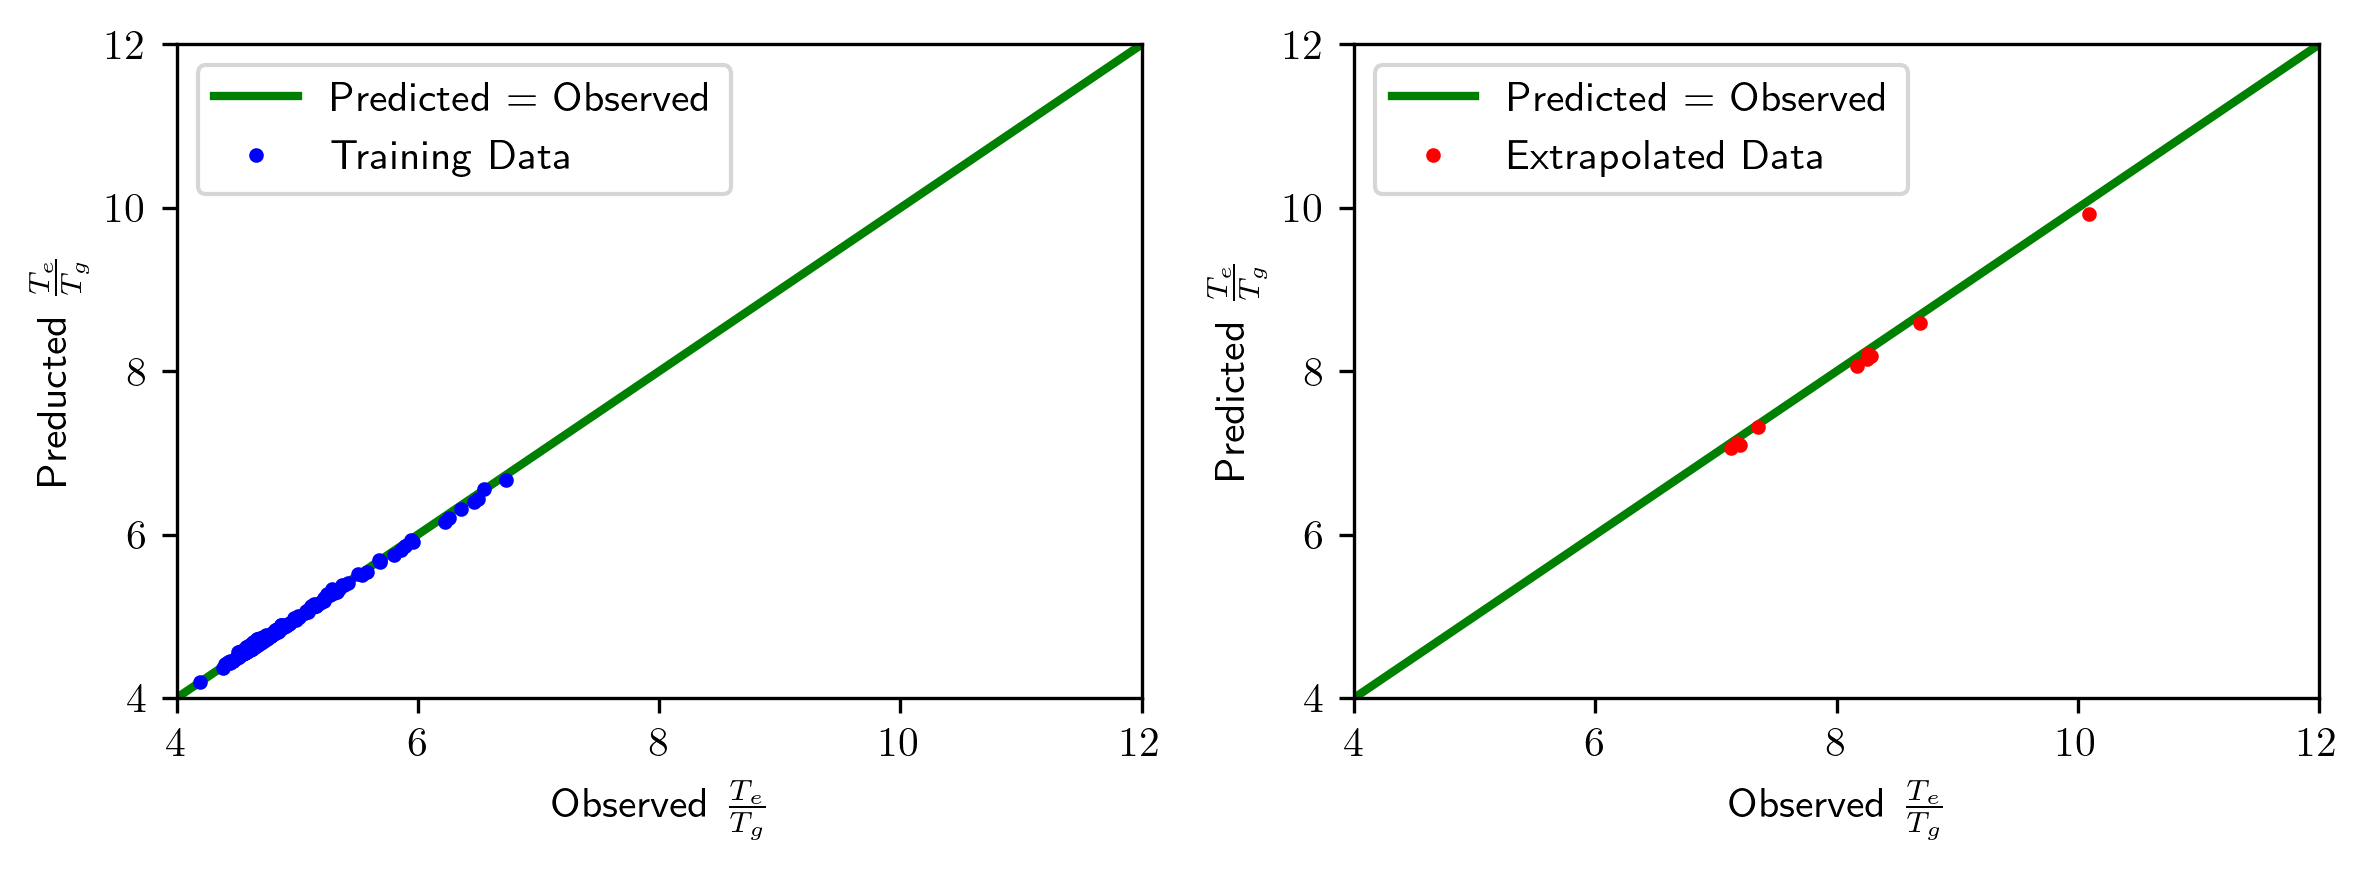

In [22]:
# invert the rescale at in the third cell.
# g  = Te,a/Tg. np.min(g = Te/Tg) > 0, so
# the rescale in the third cell was: g' = g/ 10**np.floor(n)
# n = np.mean( np.log10(np.min(g = Te/Tg)) , np.log10(np.max(g = Te/Tg)) )
# but n is stored from above!
# g' = g/ 10**np.floor(n) --> g = g' * 10**np.floor(n)
# so we rescale Te/Tg by c, 
n = 0.8567612314926596
c = 10**np.floor(n)

plt.figure(dpi=300, figsize=(8, 3))
plt.rcParams['text.usetex'] = True


top_val = 12*c
bottom_val = 4*c

plt.subplot(121)
plt.plot([bottom_val,top_val], [bottom_val,top_val], 'g-', lw=2, label = 'Predicted = Observed')
plt.plot(y_train*c, y_pred_train*c,'b.', ms=5, label = 'Training Data')
plt.xlim([bottom_val,top_val])
plt.ylim([bottom_val,top_val])
plt.xlabel(r'Observed $\frac{T_e}{T_g}$')
plt.ylabel(r'Preducted $\frac{T_e}{T_g}$')
plt.legend()

plt.subplot(122)
plt.plot([bottom_val,top_val], [bottom_val,top_val], 'g-', lw=2, label = 'Predicted = Observed')
plt.plot(y_test*c, y_pred_test*c,'r.', ms=5, label = 'Extrapolated Data')
plt.xlim([bottom_val,top_val])
plt.ylim([bottom_val,top_val])
plt.xlabel(r'Observed $\frac{T_e}{T_g}$')
plt.ylabel(r'Predicted $\frac{T_e}{T_g}$')
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\vvmil\Documents\Python_Vmil\Jupyter_Notebooks\Plasma_He_calcs\He_code_new\dim_num_eb_val_test\packed\eb_packed_parity_plot.png', dpi=300)

plt.show()